# 感知机模型

* 梯度下降：一次将误分类集合中所有误分类点的梯度下降；  
随机梯度下降：随机选取一个误分类点使其梯度下降。   
* $sign(x)=\left\{
\begin{array}{lll}
1 , x>0\\ 
-1 , x<0
\end{array}
\right.$   
如果我们将sign称之为激活函数的话，感知机与logistic regression的差别就是感知机激活函数是sign，logistic regression的激活函数是sigmoid。sign(x)将大于0的分为1，小于0的分为-1；sigmoid将大于0.5的分为1，小于0.5的分为0   
取$$h_{\theta}(x)=sign(x)$$
   
     
       
>1. 感知机模型   
    感知机模型如下：    
f(x)= sign(w*x+b)      
    其中，x为输入向量，sign为符号函数，括号里面大于等于0，则其值为1，括号里面小于0，则其值为-1。w为权值向量，b为偏置。求感知机模型即求模型参数w和b。感知机预测，即通过学习得到的感知机模型，对于新的输入实例给出其对应的输出类别1或者-1。   
  
>2.感知机策略       
    假设训练数据集是线性可分的，感知机学习的目标就是求得一个能够将训练数据集中正负实例完全分开的分类超平面，为了找到分类超平面，即确定感知机模型中的参数w和b，需要定义一个损失函数并通过将损失函数最小化来求w和b。         
    这里选择的损失函数是误分类点到分类超平面S的总距离。输入空间中任一点x0到超平面S的距离为： 
    ![avatar](https://img-my.csdn.net/uploads/201212/23/1356265667_3052.jpg)
    其中，||w||为w的L2范数。        
    其次，对于误分类点来说，当-yi (wxi + b)>0时，yi=-1，当-yi(wxi + b)<0时，yi=+1。所以对误分类点（xi, yi）满足：       
-yi (wxi +b) > 0         
所以误分类点（xi, yi）到分类超平面S的距离是：  
    ![avatar](https://img-my.csdn.net/uploads/201212/23/1356265741_5071.jpg)

>3. 感知机算法            
     感知机学习问题转化为求解损失函数式（1）的最优化问题，最优化的方法是随机梯度下降法。感知机学习算法是误分类驱动的，具体采用随机梯度下降法。首先，任意选取一个超平面w0，b0，然后用梯度下降法不断极小化目标函数式（1）。极小化的过程不是一次使M中所有误分类点的梯度下降，而是一次随机选取一个误分类点使其梯度下降。      
    损失函数L(w,b)的梯度是对w和b求偏导，即：      
    ![avatar](https://img-my.csdn.net/uploads/201212/23/1356265788_9788.jpg)
其中，（0<<=1）是学习率，即学习的步长。         
    综上，感知机学习算法如下：       
    这种算法的基本思想是：当一个实例点被误分类，即位于分类超平面错误的一侧时，则调整w和b，使分类超平面向该误分类点的一侧移动，以减少该误分类点与超平面的距离，直到超平面越过该误分类点使其被正确分类为止。           
      需要注意的是，这种感知机学习算法得到的模型参数不是唯一的，它会由于采用不同的参数初始值或选取不同的误分类点，而导致解不同。为了得到唯一的分类超平面，需要对分类超平面增加约束条件，线性支持向量机就是这个想法。另外，当训练数据集线性不可分时，感知机学习算法不收敛，迭代结果会发生震荡。而对于线性可分的数据集，算法一定是收敛的，即经过有限次迭代，一定可以得到一个将数据集完全正确划分的分类超平面及感知机模型。

>作者：qll125596718 
来源：CSDN 
原文：https://blog.csdn.net/qll125596718/article/details/8394186 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs  # sklearn用于生成数据集的库
from scipy.special import expit  # 自带的sigmod函数

## 含有两个特征的线性二分类问题

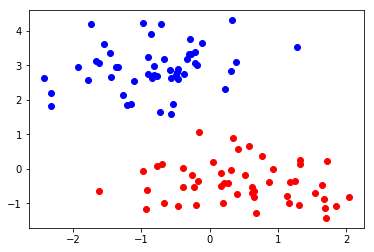

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                  center_box=(3, -3), cluster_std=0.7)  # 生成线性分类测试集,含有2个特征

plt.plot(X[np.where(y == 1), 0], X[(np.where(y == 1)), 1], 'ro')
plt.plot(X[np.where(y == 0), 0], X[(np.where(y == 0)), 1], 'bo')

In [3]:
X.shape

(100, 2)

In [4]:
X0 = X
y0 = y
for q in range(len(y)):
    if y[q] == 0:
        y[q] = -1

In [5]:
def sign(x):
    if x > 0:
        return 1
    else:
        return -1

In [9]:
# 生成超参数初值
w = np.zeros(X.shape[1]+1)  # 初权重设置为0
b = 0
alpha = 0.1  # 学习率设置为0.1
k = 0  # 记录迭代次数
i = 0

X = np.column_stack((np.ones(len(X)).reshape(100, 1), X))


def y_pre(w, x):
    return sign(np.dot(x[i], w.T))


while 1:  # 开始循环
    if y_pre(w, X)*y[i] <= 0:  # 如果误分类
        w = w+0.5*(y[i]-y_pre(w, X))*X[i]
        k += 1
    else:
        i += 1
        print("i=", i)
        print("k=", k)
    if i >= len(X):
        break

i= 1
k= 1
i= 2
k= 1
i= 3
k= 1
i= 4
k= 1
i= 5
k= 1
i= 6
k= 1
i= 7
k= 1
i= 8
k= 1
i= 9
k= 1
i= 10
k= 2
i= 11
k= 2
i= 12
k= 2
i= 13
k= 2
i= 14
k= 2
i= 15
k= 2
i= 16
k= 2
i= 17
k= 2
i= 18
k= 2
i= 19
k= 4
i= 20
k= 4
i= 21
k= 4
i= 22
k= 4
i= 23
k= 4
i= 24
k= 4
i= 25
k= 4
i= 26
k= 4
i= 27
k= 4
i= 28
k= 4
i= 29
k= 4
i= 30
k= 4
i= 31
k= 4
i= 32
k= 4
i= 33
k= 4
i= 34
k= 4
i= 35
k= 4
i= 36
k= 4
i= 37
k= 4
i= 38
k= 4
i= 39
k= 4
i= 40
k= 4
i= 41
k= 4
i= 42
k= 4
i= 43
k= 4
i= 44
k= 4
i= 45
k= 4
i= 46
k= 4
i= 47
k= 4
i= 48
k= 4
i= 49
k= 4
i= 50
k= 4
i= 51
k= 5
i= 52
k= 5
i= 53
k= 5
i= 54
k= 5
i= 55
k= 5
i= 56
k= 5
i= 57
k= 5
i= 58
k= 5
i= 59
k= 5
i= 60
k= 5
i= 61
k= 6
i= 62
k= 6
i= 63
k= 6
i= 64
k= 6
i= 65
k= 6
i= 66
k= 6
i= 67
k= 6
i= 68
k= 6
i= 69
k= 6
i= 70
k= 6
i= 71
k= 6
i= 72
k= 6
i= 73
k= 6
i= 74
k= 6
i= 75
k= 6
i= 76
k= 6
i= 77
k= 6
i= 78
k= 6
i= 79
k= 6
i= 80
k= 6
i= 81
k= 6
i= 82
k= 6
i= 83
k= 6
i= 84
k= 6
i= 85
k= 6
i= 86
k= 6
i= 87
k= 6
i= 88
k= 6
i= 89
k= 6
i= 90
k= 6
i= 91
k= 6
i= 92
k=

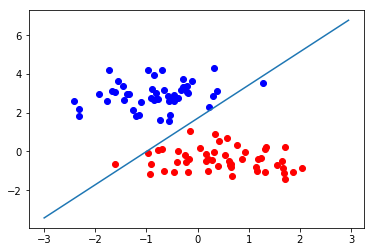

In [18]:
x0 = np.arange(-3, 3, 0.05)
plt.plot(X0[np.where(y0 == 1), 0], X0[(np.where(y0 == 1)), 1], 'ro')
plt.plot(X0[np.where(y0 == -1), 0], X0[(np.where(y0 == -1)), 1], 'bo')
plt.plot(x0, w[0]/w[2]+w[1]/w[2]*x0)

# 人工神经网络&反向传播算法(1隐含层）

sigmoid导数具体的推导过程如下：($f(z)=sigmod(z)$) 
    $$f′(z)=\frac{1}{(1+e^{-z})′}=      
  \frac{e^{−z}}{(1+e^{-z})^2}=       
  \frac{1+e^{−z}-1}{(1+e^{-z})^2}=            
  \frac{1}{(1+e^{-z})}(1-\frac{1}{(1+e^{-z})})=     
  f(z)(1−f(z))$$

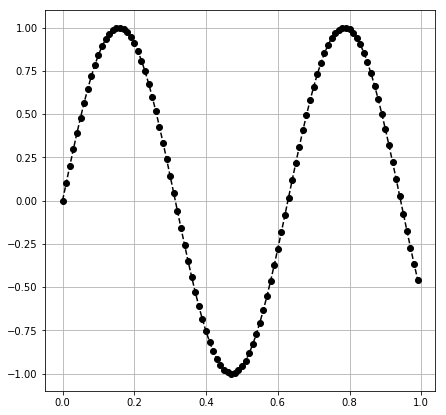

In [16]:
# 生成（0,1）的sin（10x）数据集
x0 = np.arange(0, 1, 0.01).reshape(100, 1)
y0 = np.sin(10*x0)
plt.figure(figsize=(7, 7))
plt.plot(x0, y, 'k--o')
plt.grid(True)

In [3]:
from scipy.special import expit  # 自带的sigmod函数作为激活函数


def expit_derivative(x):  # 激活函数的导数
    return x * (1-x)

In [21]:
iter = 1000000
alpha = 0.1
m = x0.shape[0]
input_dimension = x0.shape[1]
hidden_layer_1_dimension = 20

output_dimension = y.shape[1]

X = x0
y = y0
Omega1 = np.random.randn(
    input_dimension+1, hidden_layer_1_dimension)  # 标准正态分布的随机数

Omega2 = np.random.randn(hidden_layer_1_dimension+1, output_dimension)

J = np.empty(iter)
ii = np.empty(iter)

for i in np.arange(iter):

    # forward

    a1 = X
    a11 = np.insert(a1, 0, values=1, axis=1)
    Z2 = np.dot(a11, Omega1)
    a2 = expit(Z2)
    a21 = np.insert(a2, 0, values=1, axis=1)
    Z3 = np.dot(a21, Omega2)
    a3 = Z3  # 最终预测值

    # 计算 cost function

    J[i] = np.dot((a3-y).T, (a3-y))/2/m
    ii[i] = i

    # backpropagation

    delta3 = a3 - y
    d_Omega2 = np.dot(a21.T, delta3)

    delta2 = np.dot(delta3, Omega2[1:, :].T)*(a2*(1-a2))
    d_Omega1 = np.dot(a11.T, delta2)

    # update weights

    Omega1 = Omega1 - alpha*d_Omega1/m
    Omega2 = Omega2 - alpha*d_Omega2/m

training err: 0.008867917302316128


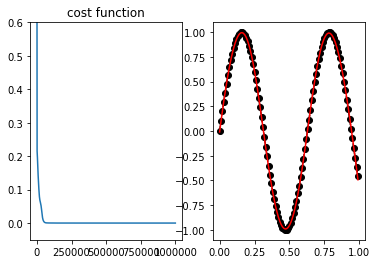

In [23]:
print("training err:", np.sqrt(2*J[-1]))
plt.subplot(121)
plt.plot(ii, J)
plt.title("cost function")
plt.ylim([-0.05, 0.6])
# plt.ylim()
plt.subplot(122)
plt.plot(X, y, 'k--o')
plt.plot(X, a3, "r-")